# Лабораторная работа №4
# Генерация стационарных СП

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
f"Вариант {(75350035 + 2) % 3 + 1}"

'Вариант 1'

Реализовать программу генерации стационарного СП с заданной автокорреляционной функцией $ K(\tau) $. Сгенерировать реализацию (реализации) СП и провести подходящее (правильное) исследование различных характеристик СП. По возможности продемонстрировать с помощью графиков.

## Автокорреляционная функция
$$ K(\tau) = D e^{-\alpha |\tau|} (1 + \alpha |\tau|) $$

Для формирования случайного процесса с имеющейся автокорреляционной функцией воспользуемся **методом формирующего фильра**

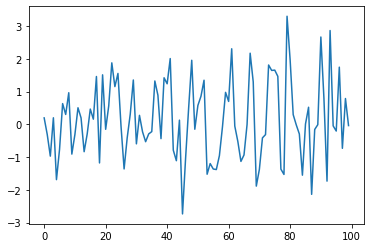

In [60]:
def get_x_sample_values(amount=100):    
    expectation = 0
    sigma = 1
    return np.random.normal(expectation, sigma, size=amount)

x = get_x_sample_values()
plt.plot(x)
plt.show()

In [99]:
alpha = 3
alpha

3

In [100]:
t0 = 0
t1 = 10
delta_t = 0.1
time_points = np.arange(t0, t1, delta_t)

In [135]:
def Y(j, alpha, delta_t, x):
    return np.sqrt(delta_t) * 2 * (alpha ** 1.5) * sum(i * delta_t * np.exp(-alpha * i * delta_t) * x[j - i] for i in range(len(time_points)))

In [136]:
def get_Y_samples(samles_amount, one_sample_amount):
    res = []
    for _ in range(samles_amount): 
        x = get_x_sample_values(one_sample_amount)
        y = [Y(j, alpha, delta_t, x) for j in range(one_sample_amount)]
        res.append(y)
    return res

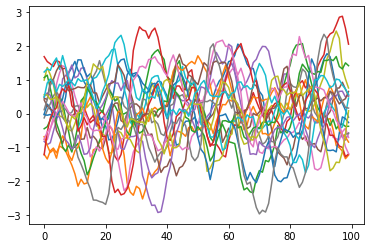

In [137]:
y_samples = get_Y_samples(samles_amount=20, one_sample_amount=len(time_points))
for y in y_samples:
    plt.plot(y)

In [138]:
def expected_value(t, samples):
    return sum(s[t] for s in samples) / len(samples)

def expected_value_for_time(time, samples):
    return sum(expected_value(i, samples) for i in range(len(time))) / len(time)

In [139]:
print(f"Теоретическое мат ожидание: {0}")
print(f"Практическое мат ожидание: {expected_value_for_time(time_points, y_samples)}")

Теоретическое мат ожидание: 0
Практическое мат ожидание: 0.06229126023903692


In [140]:
def variance(t, samples):
    exp = expected_value(t, samples)
    return sum(s[t]**2 - exp**2 for s in samples) / len(samples)

def variance_value_for_time(time, samples):
    return sum(variance(i, y_samples) for i in range(len(time))) / len(time)

In [141]:
print(f"Теоретическая дисперсия: {1}")
print(f"Практическая дисперсия: {variance_value_for_time(time_points, y_samples)}")

Теоретическая дисперсия: 1
Практическая дисперсия: 0.8855770812529756


In [142]:
def autocorreletion_coefficient(t1, t2, samples):
    exp1 = expected_value(t1, samples)
    exp2 = expected_value(t2, samples)
    return sum((s[t1]-exp1) * (s[t2]-exp2) for s in samples) / (len(samples)-1)

def autocorreletion_function_value(time_points, samples):
    time_indicies = [i for i in range(len(time_points))]
    return sum(autocorreletion_coefficient(i, j, samples) for i, j in zip(time_indicies[:-1], time_indicies[1:])) / len(time_indicies)

In [143]:
def auto(alpha, delta_t):
    return np.exp(-alpha * delta_t) * (1 + alpha * delta_t)

print(f"Теоретическая автокорреляция: {auto(alpha, delta_t)}")
print(f"Практическая автокорреляция: {autocorreletion_function_value(time_points, y_samples)}")

Теоретическая автокорреляция: 0.9630636868862332
Практическая автокорреляция: 0.8830606545248544
